In [3]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import json

sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.precompute.accretion import Mdot_Edd, L_ADAF, e0_a

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../../matplotlibrc')

# raw data

In [4]:
e_data = {}
for delta in [0.5, 0.1, 1e-2, 1e-3]:
    name = f'{delta:.3f}'
    r, e = np.loadtxt(f'../../data/pbh-accretion/delta{name}.txt', unpack=True)
    e_data[name] = (list(r), list(e/100))
json.dump(e_data, open('../../data/pbh-accretion/epsilon.json', 'w'), indent=4)

In [5]:
e_data = json.load(open('../../data/pbh-accretion/epsilon.json'))

# Fig. 1 in XY12

[Text(0.5, 0, '$\\dot{M}/\\dot{M}_{\\rm Edd}$'), Text(0, 0.5, '$\\epsilon$')]

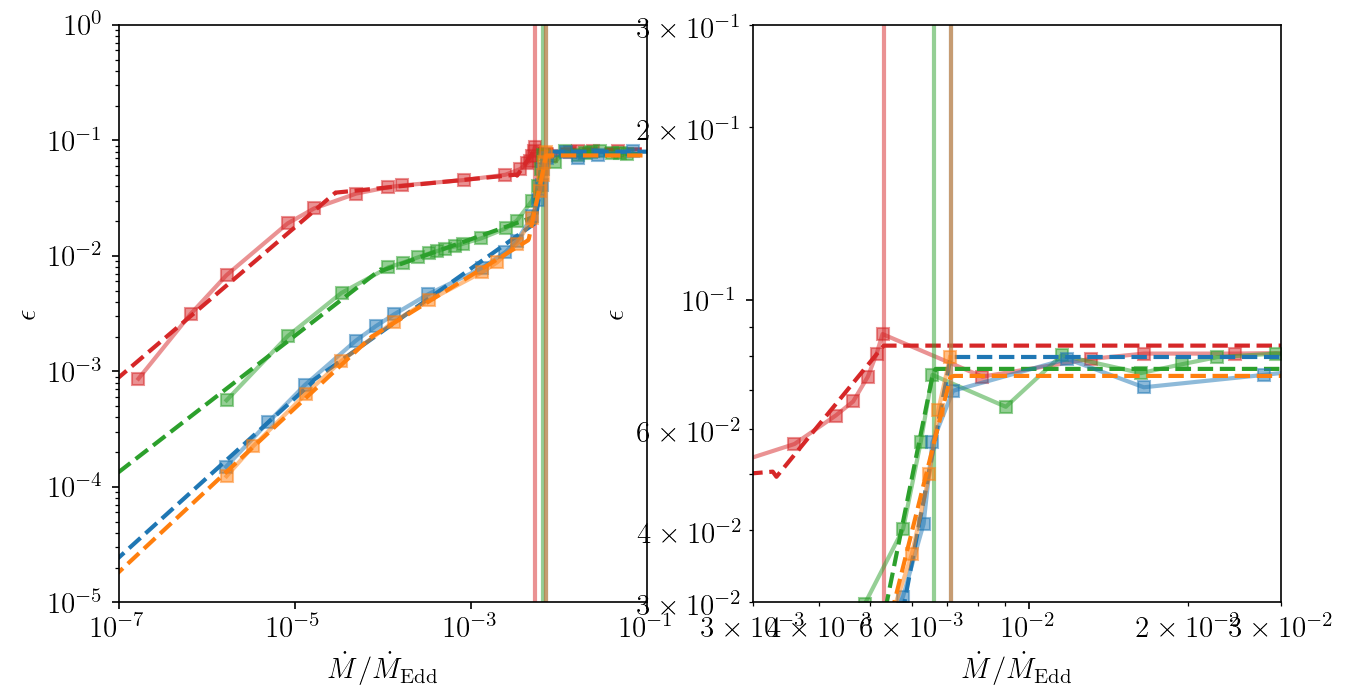

In [ ]:
m_PBH = 100

ratio_max = [5.3e-3, 6.6e-3, 7.1e-3, 7.1e-3]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for iax, delta in enumerate([0.5, 0.1, 1e-2, 1e-3]):
    Mdot_MdotEdd_s = np.geomspace(1e-8, 1e-1, 1000)
    Mdot_s = Mdot_MdotEdd_s * Mdot_Edd(m_PBH)
    L_s = np.array([L_ADAF(Mdot, m_PBH, delta=delta) for Mdot in Mdot_s])

    axs[0].plot(Mdot_MdotEdd_s, L_s/Mdot_s, '--', label=f'$\\delta = {delta:.3f}$', color=f'C{iax}')
    axs[0].plot(*e_data[f'{delta:.3f}'], 's-', color=f'C{iax}', alpha=0.5)
    axs[0].axvline(ratio_max[iax], color=f'C{iax}', ls='-', alpha=0.5)
    
    axs[1].plot(Mdot_MdotEdd_s, L_s/Mdot_s, '--', label=f'$\\delta = {delta:.3f}$', color=f'C{iax}')
    axs[1].plot(*e_data[f'{delta:.3f}'], 's-', color=f'C{iax}', alpha=0.5)
    axs[1].axvline(ratio_max[iax], color=f'C{iax}', ls='-', alpha=0.5)

axs[0].set(xscale='log', yscale='log')
axs[0].set(xlim=(1e-7, 1e-1), ylim=(1e-5, 1e0))
axs[0].set(xlabel=r'$\dot{M}/\dot{M}_{\rm Edd}$', ylabel=r'$\epsilon$')

axs[1].set(xscale='log', yscale='log')
axs[1].set(xlim=(3e-3, 3e-2), ylim=(3e-2, 3e-1))
axs[1].set(xlabel=r'$\dot{M}/\dot{M}_{\rm Edd}$', ylabel=r'$\epsilon$')

[Text(0.5, 0, '$\\dot{M}/\\dot{M}_{\\rm Edd}$'), Text(0, 0.5, '$\\epsilon$')]

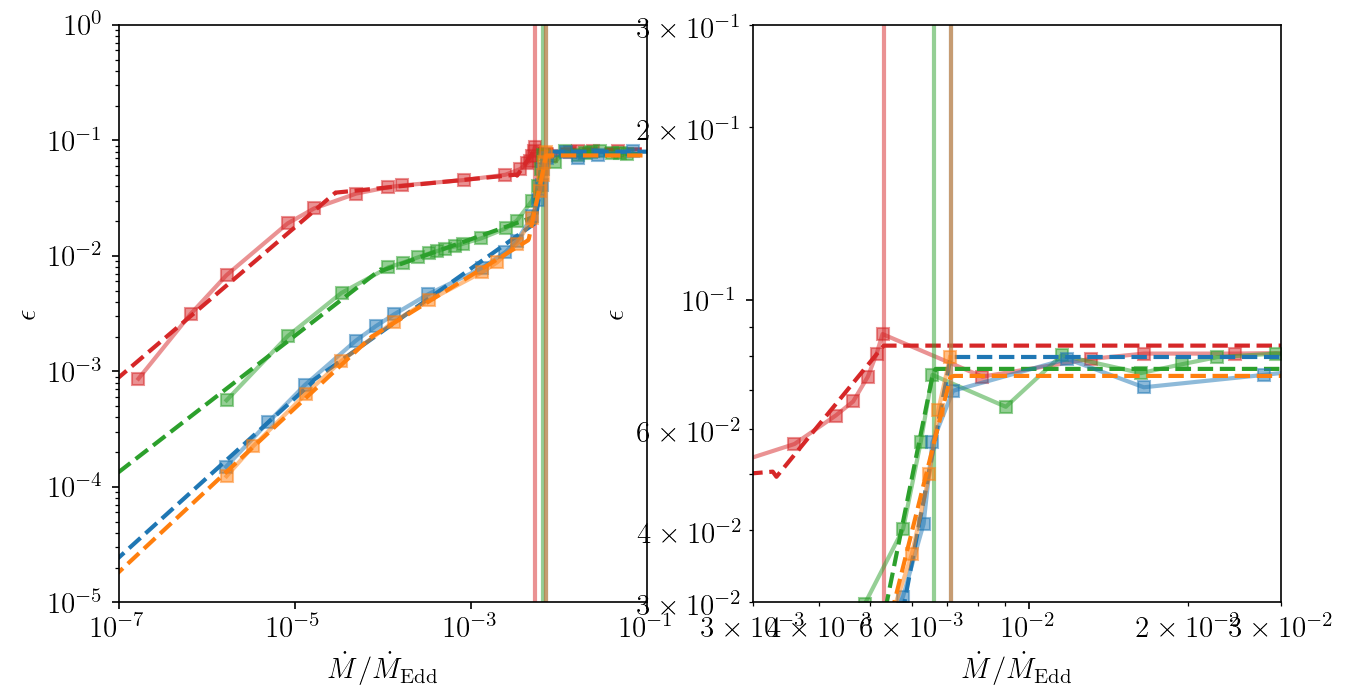

In [ ]:
m_PBH = 100

ratio_max = [5.3e-3, 6.6e-3, 7.1e-3, 7.1e-3]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for iax, delta in enumerate([0.5, 0.1, 1e-2, 1e-3]):
    Mdot_MdotEdd_s = np.geomspace(1e-8, 1e-1, 1000)
    Mdot_s = Mdot_MdotEdd_s * Mdot_Edd(m_PBH)
    L_s = np.array([L_ADAF(Mdot, m_PBH, delta=delta) for Mdot in Mdot_s])

    axs[0].plot(Mdot_MdotEdd_s, L_s/Mdot_s, '--', label=f'$\\delta = {delta:.3f}$', color=f'C{iax}')
    axs[0].plot(*e_data[f'{delta:.3f}'], 's-', color=f'C{iax}', alpha=0.5)
    axs[0].axvline(ratio_max[iax], color=f'C{iax}', ls='-', alpha=0.5)
    
    axs[1].plot(Mdot_MdotEdd_s, L_s/Mdot_s, '--', label=f'$\\delta = {delta:.3f}$', color=f'C{iax}')
    axs[1].plot(*e_data[f'{delta:.3f}'], 's-', color=f'C{iax}', alpha=0.5)
    axs[1].axvline(ratio_max[iax], color=f'C{iax}', ls='-', alpha=0.5)

axs[0].set(xscale='log', yscale='log')
axs[0].set(xlim=(1e-7, 1e-1), ylim=(1e-5, 1e0))
axs[0].set(xlabel=r'$\dot{M}/\dot{M}_{\rm Edd}$', ylabel=r'$\epsilon$')

axs[1].set(xscale='log', yscale='log')
axs[1].set(xlim=(3e-3, 3e-2), ylim=(3e-2, 3e-1))
axs[1].set(xlabel=r'$\dot{M}/\dot{M}_{\rm Edd}$', ylabel=r'$\epsilon$')

In [12]:
for delta, r_max in zip([0.5, 0.1, 1e-2, 1e-3], ratio_max):
    e0, a = e0_a(r_max, delta)
    print(e0 * (100 * r_max)**a)

0.08349066021782482
0.07612092066538956
0.07977233083069174
0.07397610955154808
